In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from functools import reduce
from matplotlib.colors import LinearSegmentedColormap
%matplotlib inline
pd.set_option('display.max_columns', None)

In [2]:
#bring in data
human_df = pd.read_csv("../Data/human-development-index.csv")
happiness = pd.read_csv("../Data/happiness-cantril-ladder.csv")

cancer_death = pd.read_csv("../Data/cancer-death-rates.csv")
cancer_incidence = pd.read_csv("../Data/cancer-incidence.csv")
dalys = pd.read_csv("../Data/dalys-rate-from-all-causes.csv")
life_exp = pd.read_csv("../Data/life-expectancy.csv")
mental_health = pd.read_csv("../Data/mental-health-share-of-total-disease-burden.csv")
air_pollution = pd.read_csv("../Data/death-rate-by-source-from-air-pollution.csv")
vac_prev_death = pd.read_csv("../Data/deaths-caused-by-vaccine-preventable-diseases.csv")
health_ins_cov = pd.read_csv("../Data/health-insurance-coverage-in-the-us.csv")
death_risk = pd.read_csv("../Data/number-of-deaths-by-risk-factor.csv")
suicide = pd.read_csv("../Data/suicide-death-rates.csv")
inf_disease = pd.read_csv("../Data/the-number-of-cases-of-infectious-diseases.csv")
gdp = pd.read_csv("../Data/maddison-data-gdp-per-capita-in-2011us-single-benchmark.csv")
co2 = pd.read_csv("../Data/annual-co2-emissions-per-country.csv")
child_mort = pd.read_csv("../Data/child-mortality-igme.csv")
malnutrition = pd.read_csv("../Data/malnutrition-death-rates.csv")

# Clean and Transform Data
Filter for the Country (maybe the year as well)<br>
Sort values for readability <br>
Insert the 'start_value' column, to get the 'score' calculation <br>
The 'score' value represents change from the 'start_value'. Calculated by subtracting the current value from the 'start_value'.<br>
Reduce columns <br>

In [3]:
#filter and clean the hdi data
human_df_clean = human_df[(human_df['Code'] == 'USA')&(human_df['Year'] >= 2006)&(human_df['Year'] < 2018)]
human_df_clean = human_df_clean.sort_values(['Year'], ascending = (True))
human_df_clean.insert(4, 'start_value_human', 0.901)
#human_df_clean['start_value_human'] = (human_df_clean['Human Development Index (UNDP)'].shift(1))
human_df_clean['score_human'] = round((human_df_clean['Human Development Index (UNDP)'] / human_df_clean['start_value_human'])-1,4)
human_df_clean = human_df_clean[['Entity', 'Year','score_human']]
human_df_clean

,Entity,Year,score_human
4780,United States,2006,0.0000
4781,United States,2007,0.0044
4782,United States,2008,0.0100
4783,United States,2009,0.0100
4784,United States,2010,0.0144
4785,United States,2011,0.0178
4786,United States,2012,0.0189
4787,United States,2013,0.0166
4788,United States,2014,0.0189
4789,United States,2015,0.0211


In [4]:
#filter and clean happiness data
happiness_clean = happiness[(happiness['Code'] == 'USA')&(happiness['Year'] >= 2006)&(happiness['Year'] < 2018)]
happiness_clean = happiness_clean.sort_values(['Year'], ascending = (True))
happiness_clean.insert(4, 'start_value_h', 7.181794)
#happiness_clean['start_value_h'] = (happiness_clean['Life satisfaction in Cantril Ladder (World Happiness Report 2019)'].shift(1))
happiness_clean['score_happy'] = round((happiness_clean['Life satisfaction in Cantril Ladder (World Happiness Report 2019)'] / happiness_clean['start_value_h'])-1,4)
happiness_clean = happiness_clean[['Entity', 'Year','score_happy']]
happiness_clean

,Entity,Year,score_happy
1604,United States,2006,-0.0000
1605,United States,2007,0.0461
1606,United States,2008,0.0137
1607,United States,2009,-0.0033
1608,United States,2010,-0.0025
1609,United States,2011,-0.0093
1610,United States,2012,-0.0217
1611,United States,2013,0.0094
1612,United States,2014,-0.0043
1613,United States,2015,-0.0443


In [5]:
#filter and clean cancer death data
cancer_death_clean = cancer_death[(cancer_death['Code'] == 'USA')&(cancer_death['Year'] >= 2006)&(cancer_death['Year'] < 2018)]
cancer_death_clean = cancer_death_clean.sort_values(['Year'], ascending = (True))
cancer_death_clean.insert(4, 'start_value_cd', 139.857968)
#cancer_death_clean['start_value_cd'] = (cancer_death_clean['Deaths - Neoplasms - Sex: Both - Age: Age-standardized (Rate)'].shift(1))
cancer_death_clean['score_cd'] = round((cancer_death_clean['Deaths - Neoplasms - Sex: Both - Age: Age-standardized (Rate)'] / cancer_death_clean['start_value_cd'])-1,4)
cancer_death_clean = cancer_death_clean[['Entity', 'Year','score_cd']]
cancer_death_clean

,Entity,Year,score_cd
6092,United States,2006,0.0000
6093,United States,2007,-0.0190
6094,United States,2008,-0.0300
6095,United States,2009,-0.0425
6096,United States,2010,-0.0658
6097,United States,2011,-0.0725
6098,United States,2012,-0.0858
6099,United States,2013,-0.0959
6100,United States,2014,-0.1016
6101,United States,2015,-0.1051


In [6]:
#filter and clean cancer incidence data
cancer_incidence_clean = cancer_incidence[(cancer_incidence['Code'] == 'USA')&(cancer_incidence['Year'] >= 2006)&(cancer_incidence['Year'] < 2018)]
cancer_incidence_clean = cancer_incidence_clean.sort_values(['Year'], ascending = (True))
cancer_incidence_clean.insert(4, 'start_value_ci', 1279.477805)
#cancer_incidence_clean['start_value_ci'] = (cancer_incidence_clean['Incidence - Neoplasms - Sex: Both - Age: Age-standardized (Rate)'].shift(1))
cancer_incidence_clean['score_ci'] = round((cancer_incidence_clean['Incidence - Neoplasms - Sex: Both - Age: Age-standardized (Rate)'] / cancer_incidence_clean['start_value_ci'])-1,4)
cancer_incidence_clean = cancer_incidence_clean[['Entity', 'Year','score_ci']]
cancer_incidence_clean

,Entity,Year,score_ci
6092,United States,2006,0.0000
6093,United States,2007,-0.0023
6094,United States,2008,-0.0023
6095,United States,2009,-0.0016
6096,United States,2010,-0.0051
6097,United States,2011,-0.0052
6098,United States,2012,-0.0081
6099,United States,2013,-0.0102
6100,United States,2014,-0.0110
6101,United States,2015,-0.0100


In [7]:
#filter and clean dalys data
dalys_clean = dalys[(dalys['Code'] == 'USA')&(dalys['Year'] >= 2006)&(dalys['Year'] < 2018)]
dalys_clean = dalys_clean.sort_values(['Year'], ascending = (True))
dalys_clean.insert(4, 'start_value_d', 24784.593979)
#dalys_clean['start_value_d'] = (dalys_clean['DALYs (Disability-Adjusted Life Years) - All causes - Sex: Both - Age: Age-standardized (Rate)'].shift(1))
dalys_clean['score_d'] = round((dalys_clean['DALYs (Disability-Adjusted Life Years) - All causes - Sex: Both - Age: Age-standardized (Rate)'] / dalys_clean['start_value_d'])-1,4)
dalys_clean = dalys_clean[['Entity', 'Year','score_d']]
dalys_clean

,Entity,Year,score_d
6092,United States,2006,-0.0000
6093,United States,2007,-0.0111
6094,United States,2008,-0.0202
6095,United States,2009,-0.0296
6096,United States,2010,-0.0430
6097,United States,2011,-0.0421
6098,United States,2012,-0.0456
6099,United States,2013,-0.0457
6100,United States,2014,-0.0431
6101,United States,2015,-0.0356


In [8]:
#filter and clean life exp data
life_exp_clean = life_exp[(life_exp['Code'] == 'USA')&(life_exp['Year'] >= 2006)&(life_exp['Year'] < 2018)]
life_exp_clean = life_exp_clean.sort_values(['Year'], ascending = (True))
life_exp_clean.insert(4, 'start_value_le', 77.892)
#life_exp_clean['start_value_le'] = (life_exp_clean['Life expectancy'].shift(1))
life_exp_clean['score_le'] = round((life_exp_clean['Life expectancy'] / life_exp_clean['start_value_le'])-1,4)
life_exp_clean = life_exp_clean[['Entity', 'Year','score_le']]
life_exp_clean

,Entity,Year,score_le
18087,United States,2006,0.0000
18088,United States,2007,0.0027
18089,United States,2008,0.0053
18090,United States,2009,0.0077
18091,United States,2010,0.0098
18092,United States,2011,0.0114
18093,United States,2012,0.0125
18094,United States,2013,0.0131
18095,United States,2014,0.0132
18096,United States,2015,0.0131


In [9]:
#filter and clean mental health data
mental_health_clean = mental_health[(mental_health['Code'] == 'USA')&(mental_health['Year'] >= 2006)&(mental_health['Year'] < 2018)]
mental_health_clean = mental_health_clean.sort_values(['Year'], ascending = (True))
mental_health_clean.insert(4, 'start_value_mh', 8.112356)
#mental_health_clean['start_value_mh'] = (mental_health_clean['DALYs (Disability-Adjusted Life Years) - Mental health disorders (Age-standardized percent)'].shift(1))
mental_health_clean['score_mh'] = round((mental_health_clean['DALYs (Disability-Adjusted Life Years) - Mental health disorders (Age-standardized percent)'] / mental_health_clean['start_value_mh'])-1,4)
mental_health_clean = mental_health_clean[['Entity', 'Year','score_mh']]
mental_health_clean

,Entity,Year,score_mh
5794,United States,2006,0.0000
5795,United States,2007,0.0003
5796,United States,2008,0.0001
5797,United States,2009,0.0010
5798,United States,2010,-0.0012
5799,United States,2011,-0.0050
5800,United States,2012,-0.0106
5801,United States,2013,-0.0191
5802,United States,2014,-0.0275
5803,United States,2015,-0.0379


In [10]:
#filter and clean air pollution deaths
air_pollution_clean = air_pollution[(air_pollution['Code'] == 'USA')&(air_pollution['Year'] >= 2006)&(air_pollution['Year'] < 2018)]
air_pollution_clean = air_pollution_clean.sort_values(['Year'], ascending = (True))
air_pollution_clean['total'] = air_pollution_clean['Deaths - Ambient ozone pollution - Sex: Both - Age: Age-standardized (Rate)'] + air_pollution_clean['Deaths - Household air pollution from solid fuels - Sex: Both - Age: Age-standardized (Rate)'] + air_pollution_clean['Deaths - Ambient particulate matter pollution - Sex: Both - Age: Age-standardized (Rate)']
air_pollution_clean.insert(4, 'start_value_ap', 26.494357)
#air_pollution_clean['start_value_ap'] = (air_pollution_clean['total'].shift(1))
air_pollution_clean['score_ap'] = round((air_pollution_clean['total'] / air_pollution_clean['start_value_ap'])-1,4)
air_pollution_clean = air_pollution_clean[['Entity', 'Year','score_ap']]
air_pollution_clean

,Entity,Year,score_ap
6092,United States,2006,-0.0000
6093,United States,2007,-0.0309
6094,United States,2008,-0.0482
6095,United States,2009,-0.0758
6096,United States,2010,-0.1125
6097,United States,2011,-0.0955
6098,United States,2012,-0.1501
6099,United States,2013,-0.1772
6100,United States,2014,-0.2162
6101,United States,2015,-0.2285


In [11]:
#list to make totaling easier
vac_list = list(vac_prev_death)
vac_list.remove('Entity')
vac_list.remove('Code')
vac_list.remove('Year')
#filter and clean vaccine preventable deaths
vac_prev_death_clean = vac_prev_death[(vac_prev_death['Code'] == 'USA')&(vac_prev_death['Year'] >= 2006)&(vac_prev_death['Year'] < 2018)]
vac_prev_death_clean = vac_prev_death_clean.sort_values(['Year'], ascending = (True))
vac_prev_death_clean['total'] = vac_prev_death_clean[vac_list].sum(axis = 1)
vac_prev_death_clean.insert(4, 'start_value_vd', 2412.136572)
#vac_prev_death_clean['start_value_vd'] = (vac_prev_death_clean['total'].shift(1))
vac_prev_death_clean['score_vd'] = round((vac_prev_death_clean['total'] / vac_prev_death_clean['start_value_vd'])-1,4)
vac_prev_death_clean = vac_prev_death_clean[['Entity', 'Year','score_vd']]
vac_prev_death_clean

,Entity,Year,score_vd
6092,United States,2006,0.0000
6093,United States,2007,-0.0914
6094,United States,2008,-0.1430
6095,United States,2009,-0.1884
6096,United States,2010,-0.2342
6097,United States,2011,-0.2459
6098,United States,2012,-0.2631
6099,United States,2013,-0.2604
6100,United States,2014,-0.2614
6101,United States,2015,-0.2495


In [12]:
#filter and clean health insurance coverage data
health_ins_cov_clean = health_ins_cov[(health_ins_cov['Code'] == 'USA')&(health_ins_cov['Year'] >= 2006)&(health_ins_cov['Year'] < 2018)]
health_ins_cov_clean = health_ins_cov_clean.sort_values(['Year'], ascending = (True))
health_ins_cov_clean.insert(4, 'start_value_hi', 84.2)
#health_ins_cov_clean['start_value_hi'] = (health_ins_cov_clean['Health Insurance Coverage US, Any Plan (US Current Population Survey (2014))'].shift(1))
health_ins_cov_clean['score_hi'] = round((health_ins_cov_clean['Health Insurance Coverage US, Any Plan (US Current Population Survey (2014))'] / health_ins_cov_clean['start_value_hi'])-1,4)
health_ins_cov_clean = health_ins_cov_clean[['Entity', 'Year','score_hi']]
health_ins_cov_clean

,Entity,Year,score_hi
19,United States,2006,0.0000
20,United States,2007,0.0059
21,United States,2008,0.0048
22,United States,2009,-0.0036
23,United States,2010,-0.0059
24,United States,2011,0.0012
25,United States,2012,0.0048
26,United States,2013,0.0297
27,United States,2014,0.0641


In [13]:
#filter and clean death by risk factor data - sanitiation
death_risk_san_clean = death_risk[(death_risk['Code'] == 'USA')&(death_risk['Year'] >= 2006)&(death_risk['Year'] < 2018)]
death_risk_san_clean = death_risk_san_clean.sort_values(['Year'], ascending = (True))
death_risk_san_clean.insert(4, 'start_value_s', 664.778667)
#death_risk_san_clean['start_value_s'] = (death_risk_san_clean['Deaths - Unsafe sanitation - Sex: Both - Age: All Ages (Number)'].shift(1))
death_risk_san_clean['score_s'] = round((death_risk_san_clean['Deaths - Unsafe sanitation - Sex: Both - Age: All Ages (Number)'] / death_risk_san_clean['start_value_s'])-1,4)
death_risk_san_clean = death_risk_san_clean[['Entity', 'Year','score_s']]
death_risk_san_clean

,Entity,Year,score_s
6092,United States,2006,-0.0000
6093,United States,2007,0.0581
6094,United States,2008,0.0895
6095,United States,2009,0.0704
6096,United States,2010,0.0394
6097,United States,2011,0.0420
6098,United States,2012,0.0158
6099,United States,2013,-0.0145
6100,United States,2014,-0.0488
6101,United States,2015,-0.0835


In [14]:
#filter and clean death by risk factor data - water
death_risk_clean = death_risk[(death_risk['Code'] == 'USA')&(death_risk['Year'] >= 2006)&(death_risk['Year'] < 2018)]
death_risk_clean = death_risk_clean.sort_values(['Year'], ascending = (True))
death_risk_clean.insert(4, 'start_value_w', 399.898736)
#death_risk_clean['start_value_w'] = (death_risk_clean['Deaths - Unsafe water source - Sex: Both - Age: All Ages (Number)'].shift(1))
death_risk_clean['score_w'] = round((death_risk_clean['Deaths - Unsafe water source - Sex: Both - Age: All Ages (Number)'] / death_risk_clean['start_value_w'])-1,4)
death_risk_clean = death_risk_clean[['Entity', 'Year','score_w']]
death_risk_clean

,Entity,Year,score_w
6092,United States,2006,0.0000
6093,United States,2007,0.0009
6094,United States,2008,-0.0224
6095,United States,2009,-0.0863
6096,United States,2010,-0.1560
6097,United States,2011,-0.1488
6098,United States,2012,-0.1656
6099,United States,2013,-0.1811
6100,United States,2014,-0.2018
6101,United States,2015,-0.2212


In [15]:
#filter and clean death by suicide
suicide_clean = suicide[(suicide['Code'] == 'USA')&(suicide['Year'] >= 2006)&(suicide['Year'] < 2018)]
suicide_clean = suicide_clean.sort_values(['Year'], ascending = (True))
suicide_clean.insert(4, 'start_value_su', 11.633350	)
#suicide_clean['start_value_su'] = (suicide_clean['Deaths - Self-harm - Sex: Both - Age: Age-standardized (Rate)'].shift(1))
suicide_clean['score_su'] = round((suicide_clean['Deaths - Self-harm - Sex: Both - Age: Age-standardized (Rate)'] / suicide_clean['start_value_su'])-1,4)
suicide_clean = suicide_clean[['Entity', 'Year','score_su']]
suicide_clean

,Entity,Year,score_su
6092,United States,2006,-0.0000
6093,United States,2007,0.0037
6094,United States,2008,0.0113
6095,United States,2009,0.0177
6096,United States,2010,0.0098
6097,United States,2011,0.0270
6098,United States,2012,0.0312
6099,United States,2013,0.0349
6100,United States,2014,0.0481
6101,United States,2015,0.0749


In [16]:
#filter and clean death by HIV/AIDS
inf_disease_clean = inf_disease[(inf_disease['Code'] == 'USA')&(inf_disease['Year'] >= 2006)&(inf_disease['Year'] < 2018)]
inf_disease_clean = inf_disease_clean.sort_values(['Year'], ascending = (True))
inf_disease_clean.insert(4, 'start_value_hiv', 43422.086238)
#inf_disease_clean['start_value_hiv'] = (inf_disease_clean['Incidence - HIV/AIDS - Sex: Both - Age: All Ages (Number)'].shift(1))
inf_disease_clean['score_hiv'] = round((inf_disease_clean['Incidence - HIV/AIDS - Sex: Both - Age: All Ages (Number)'] / inf_disease_clean['start_value_hiv'])-1,4)
inf_disease_clean = inf_disease_clean[['Entity', 'Year','score_hiv']]
inf_disease_clean

,Entity,Year,score_hiv
7652,United States,2006,0.0000
7653,United States,2007,-0.0274
7654,United States,2008,-0.0587
7655,United States,2009,-0.0833
7656,United States,2010,-0.0900
7657,United States,2011,-0.0782
7658,United States,2012,-0.0574
7659,United States,2013,-0.0272
7660,United States,2014,0.0122
7661,United States,2015,0.0594


In [17]:
#filter and clean death by TB
inf_disease_t_clean = inf_disease[(inf_disease['Code'] == 'USA')&(inf_disease['Year'] >= 2006)&(inf_disease['Year'] < 2018)]
inf_disease_t_clean = inf_disease_t_clean.sort_values(['Year'], ascending = (True))
inf_disease_t_clean.insert(4, 'start_value_t', 11464.262352)
#inf_disease_t_clean['start_value_t'] = (inf_disease_t_clean['Incidence - Tuberculosis - Sex: Both - Age: All Ages (Number)'].shift(1))
inf_disease_t_clean['score_t'] = round((inf_disease_t_clean['Incidence - Tuberculosis - Sex: Both - Age: All Ages (Number)'] / inf_disease_t_clean['start_value_t'])-1,4)
inf_disease_t_clean = inf_disease_t_clean[['Entity', 'Year','score_t']]
inf_disease_t_clean

,Entity,Year,score_t
7652,United States,2006,0.0000
7653,United States,2007,-0.0339
7654,United States,2008,-0.0658
7655,United States,2009,-0.0941
7656,United States,2010,-0.1153
7657,United States,2011,-0.1343
7658,United States,2012,-0.1559
7659,United States,2013,-0.1803
7660,United States,2014,-0.2069
7661,United States,2015,-0.2348


In [18]:
#filter and clean gdp data
gdp_clean = gdp[(gdp['Code'] == 'USA')&(gdp['Year'] >= 2006)&(gdp['Year'] < 2018)]
gdp_clean = gdp_clean.sort_values(['Year'], ascending = (True))
gdp_clean.insert(4, 'start_value_gdp', 50489.86)
#gdp_clean['start_value_gdp'] = (gdp_clean['GDP per capita'].shift(1))
gdp_clean['score_gdp'] = round((gdp_clean['GDP per capita'] / gdp_clean['start_value_gdp'])-1,4)
gdp_clean = gdp_clean[['Entity', 'Year','score_gdp']]
gdp_clean

,Entity,Year,score_gdp
19142,United States,2006,0.0000
19143,United States,2007,0.0082
19144,United States,2008,-0.0042
19145,United States,2009,-0.0403
19146,United States,2010,-0.0242
19147,United States,2011,-0.0161
19148,United States,2012,-0.0019
19149,United States,2013,0.0074
19150,United States,2014,0.0233
19151,United States,2015,0.0416


In [19]:
#filter and clean co2 data
co2_clean = co2[(co2['Code'] == 'USA')&(co2['Year'] >= 2006)&(co2['Year'] < 2018)]
co2_clean = co2_clean.sort_values(['Year'], ascending = (True))
co2_clean.insert(4, 'start_value_co2', 6.051051e+09)
#co2_clean['start_value_co2'] = (co2_clean['Annual CO2 emissions'].shift(1))
co2_clean['score_co2'] = round((co2_clean['Annual CO2 emissions'] / co2_clean['start_value_co2'])-1,4)
co2_clean = co2_clean[['Entity', 'Year','score_co2']]
co2_clean

,Entity,Year,score_co2
22059,United States,2006,0.0000
22060,United States,2007,0.0128
22061,United States,2008,-0.0199
22062,United States,2009,-0.0925
22063,United States,2010,-0.0583
22064,United States,2011,-0.0803
22065,United States,2012,-0.1130
22066,United States,2013,-0.0887
22067,United States,2014,-0.0809
22068,United States,2015,-0.1055


In [20]:
#filter and clean child mortality data
child_mort_clean = child_mort[(child_mort['Code'] == 'USA')&(child_mort['Year'] >= 2006)&(child_mort['Year'] < 2018)]
child_mort_clean = child_mort_clean.sort_values(['Year'], ascending = (True))
child_mort_clean.insert(4, 'start_value_cm', 0.79)
#child_mort_clean['start_value_cm'] = (child_mort_clean['Mortality rate, under-5 (per 1,000 live births)'].shift(1))
child_mort_clean['score_cm'] = round((child_mort_clean['Mortality rate, under-5 (per 1,000 live births)'] / child_mort_clean['start_value_cm'])-1,4)
child_mort_clean = child_mort_clean[['Entity', 'Year','score_cm']]
child_mort_clean

,Entity,Year,score_cm
10701,United States,2006,0.0000
10702,United States,2007,-0.0253
10703,United States,2008,-0.0380
10704,United States,2009,-0.0506
10705,United States,2010,-0.0759
10706,United States,2011,-0.0886
10707,United States,2012,-0.1013
10708,United States,2013,-0.1139
10709,United States,2014,-0.1266
10710,United States,2015,-0.1392


In [21]:
#filter and clean malnutrition data
malnutrition_clean = malnutrition[(malnutrition['Code'] == 'USA')&(malnutrition['Year'] >= 2006)&(malnutrition['Year'] < 2018)]
malnutrition_clean = malnutrition_clean.sort_values(['Year'], ascending = (True))
malnutrition_clean.insert(4, 'start_value_mal', 0.613744)
#malnutrition_clean['start_value_mal'] = (malnutrition_clean['Deaths - Protein-energy malnutrition - Sex: Both - Age: Age-standardized (Rate)'].shift(1))
malnutrition_clean['score_mal'] = round((malnutrition_clean['Deaths - Protein-energy malnutrition - Sex: Both - Age: Age-standardized (Rate)'] / malnutrition_clean['start_value_mal'])-1,4)
malnutrition_clean = malnutrition_clean[['Entity', 'Year','score_mal']]
malnutrition_clean

,Entity,Year,score_mal
6092,United States,2006,-0.0000
6093,United States,2007,-0.0003
6094,United States,2008,0.0128
6095,United States,2009,0.0135
6096,United States,2010,0.0173
6097,United States,2011,0.0444
6098,United States,2012,0.0583
6099,United States,2013,0.0835
6100,United States,2014,0.1206
6101,United States,2015,0.1519


# Merge dfs
https://stackoverflow.com/questions/44327999/python-pandas-merge-multiple-dataframes

In [22]:
#merge dfs
data_frames = [human_df_clean,
               happiness_clean, 
               cancer_death_clean, 
               cancer_incidence_clean,
               dalys_clean, 
               life_exp_clean,
               mental_health_clean,
               air_pollution_clean,
               vac_prev_death_clean,
               health_ins_cov_clean,
               death_risk_san_clean,
               death_risk_clean,
               suicide_clean,
               inf_disease_clean,
               inf_disease_t_clean,
               gdp_clean,
               co2_clean,
               child_mort_clean,
               malnutrition_clean
              ]

df_merged = reduce(lambda  left,right: pd.merge(left,right,on=['Entity','Year'],how='outer'), data_frames)
df_merged = df_merged.sort_values(['Year'], ascending = (False))

# Find correlation factors and explore

In [23]:
df_corr = df_merged.corr()
df_corr = abs(df_corr)
df_merged

,Entity,Year,score_human,score_happy,score_cd,score_ci,score_d,score_le,score_mh,score_ap,score_vd,score_hi,score_s,score_w,score_su,score_hiv,score_t,score_gdp,score_co2,score_cm,score_mal
11,United States,2017,0.0255,-0.0265,-0.0873,-0.0008,-0.0193,0.0124,NaN,-0.2725,-0.1922,NaN,-0.1323,-0.2579,0.1034,0.1806,-0.2940,0.0697,-0.1318,-0.1646,0.1200
10,United States,2016,0.0233,-0.0527,-0.0916,-0.0036,-0.0222,0.0127,-0.0460,-0.2732,-0.2140,NaN,-0.1215,-0.2474,0.1039,0.1157,-0.2639,0.0500,-0.1254,-0.1519,0.1279
9,United States,2015,0.0211,-0.0443,-0.1051,-0.0100,-0.0356,0.0131,-0.0379,-0.2285,-0.2495,NaN,-0.0835,-0.2212,0.0749,0.0594,-0.2348,0.0416,-0.1055,-0.1392,0.1519
8,United States,2014,0.0189,-0.0043,-0.1016,-0.0110,-0.0431,0.0132,-0.0275,-0.2162,-0.2614,0.0641,-0.0488,-0.2018,0.0481,0.0122,-0.2069,0.0233,-0.0809,-0.1266,0.1206
7,United States,2013,0.0166,0.0094,-0.0959,-0.0102,-0.0457,0.0131,-0.0191,-0.1772,-0.2604,0.0297,-0.0145,-0.1811,0.0349,-0.0272,-0.1803,0.0074,-0.0887,-0.1139,0.0835
6,United States,2012,0.0189,-0.0217,-0.0858,-0.0081,-0.0456,0.0125,-0.0106,-0.1501,-0.2631,0.0048,0.0158,-0.1656,0.0312,-0.0574,-0.1559,-0.0019,-0.1130,-0.1013,0.0583
5,United States,2011,0.0178,-0.0093,-0.0725,-0.0052,-0.0421,0.0114,-0.0050,-0.0955,-0.2459,0.0012,0.0420,-0.1488,0.0270,-0.0782,-0.1343,-0.0161,-0.0803,-0.0886,0.0444
4,United States,2010,0.0144,-0.0025,-0.0658,-0.0051,-0.0430,0.0098,-0.0012,-0.1125,-0.2342,-0.0059,0.0394,-0.1560,0.0098,-0.0900,-0.1153,-0.0242,-0.0583,-0.0759,0.0173
3,United States,2009,0.0100,-0.0033,-0.0425,-0.0016,-0.0296,0.0077,0.0010,-0.0758,-0.1884,-0.0036,0.0704,-0.0863,0.0177,-0.0833,-0.0941,-0.0403,-0.0925,-0.0506,0.0135
2,United States,2008,0.0100,0.0137,-0.0300,-0.0023,-0.0202,0.0053,0.0001,-0.0482,-0.1430,0.0048,0.0895,-0.0224,0.0113,-0.0587,-0.0658,-0.0042,-0.0199,-0.0380,0.0128


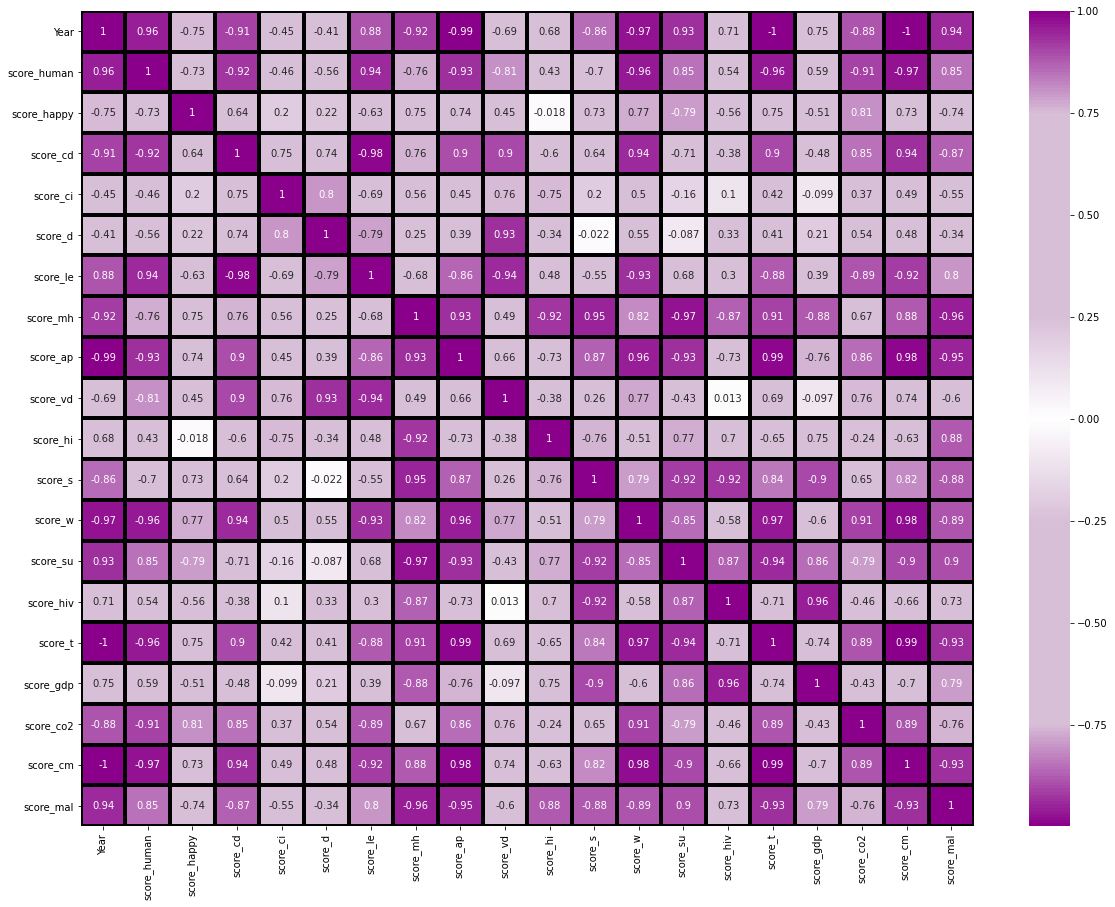

In [24]:
plt.figure(figsize = (20,15))

cmap = LinearSegmentedColormap.from_list(
    name='test', 
    colors=['darkmagenta','thistle','thistle','thistle','white','thistle','thistle','thistle','darkmagenta']
)
_=sns.heatmap(df_merged.corr(), annot=True,cmap=cmap,linewidths=3, linecolor='black')

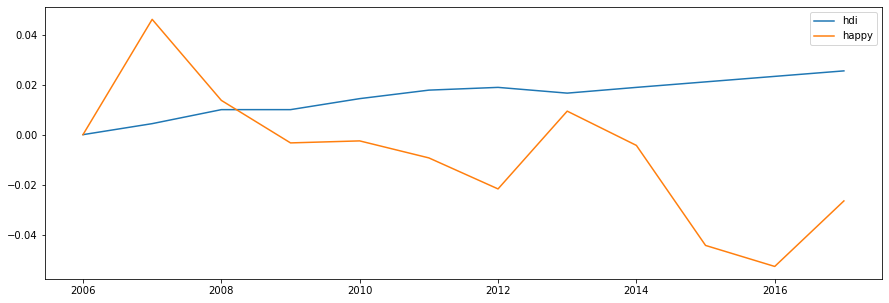

In [25]:
plt.figure(figsize = (15,5))
plt.plot(df_merged['Year'],df_merged['score_human'], label = 'hdi')
#plt.plot(df_merged['Year'],df_merged['score_le'],label = 'life')
plt.plot(df_merged['Year'],df_merged['score_happy'],label = 'happy')
plt.legend()

In [26]:
df_merged

,Entity,Year,score_human,score_happy,score_cd,score_ci,score_d,score_le,score_mh,score_ap,score_vd,score_hi,score_s,score_w,score_su,score_hiv,score_t,score_gdp,score_co2,score_cm,score_mal
11,United States,2017,0.0255,-0.0265,-0.0873,-0.0008,-0.0193,0.0124,NaN,-0.2725,-0.1922,NaN,-0.1323,-0.2579,0.1034,0.1806,-0.2940,0.0697,-0.1318,-0.1646,0.1200
10,United States,2016,0.0233,-0.0527,-0.0916,-0.0036,-0.0222,0.0127,-0.0460,-0.2732,-0.2140,NaN,-0.1215,-0.2474,0.1039,0.1157,-0.2639,0.0500,-0.1254,-0.1519,0.1279
9,United States,2015,0.0211,-0.0443,-0.1051,-0.0100,-0.0356,0.0131,-0.0379,-0.2285,-0.2495,NaN,-0.0835,-0.2212,0.0749,0.0594,-0.2348,0.0416,-0.1055,-0.1392,0.1519
8,United States,2014,0.0189,-0.0043,-0.1016,-0.0110,-0.0431,0.0132,-0.0275,-0.2162,-0.2614,0.0641,-0.0488,-0.2018,0.0481,0.0122,-0.2069,0.0233,-0.0809,-0.1266,0.1206
7,United States,2013,0.0166,0.0094,-0.0959,-0.0102,-0.0457,0.0131,-0.0191,-0.1772,-0.2604,0.0297,-0.0145,-0.1811,0.0349,-0.0272,-0.1803,0.0074,-0.0887,-0.1139,0.0835
6,United States,2012,0.0189,-0.0217,-0.0858,-0.0081,-0.0456,0.0125,-0.0106,-0.1501,-0.2631,0.0048,0.0158,-0.1656,0.0312,-0.0574,-0.1559,-0.0019,-0.1130,-0.1013,0.0583
5,United States,2011,0.0178,-0.0093,-0.0725,-0.0052,-0.0421,0.0114,-0.0050,-0.0955,-0.2459,0.0012,0.0420,-0.1488,0.0270,-0.0782,-0.1343,-0.0161,-0.0803,-0.0886,0.0444
4,United States,2010,0.0144,-0.0025,-0.0658,-0.0051,-0.0430,0.0098,-0.0012,-0.1125,-0.2342,-0.0059,0.0394,-0.1560,0.0098,-0.0900,-0.1153,-0.0242,-0.0583,-0.0759,0.0173
3,United States,2009,0.0100,-0.0033,-0.0425,-0.0016,-0.0296,0.0077,0.0010,-0.0758,-0.1884,-0.0036,0.0704,-0.0863,0.0177,-0.0833,-0.0941,-0.0403,-0.0925,-0.0506,0.0135
2,United States,2008,0.0100,0.0137,-0.0300,-0.0023,-0.0202,0.0053,0.0001,-0.0482,-0.1430,0.0048,0.0895,-0.0224,0.0113,-0.0587,-0.0658,-0.0042,-0.0199,-0.0380,0.0128


# Transform the dataframe: <br>
    For all data, multiply by the correlation to hdi(score_human)
    If the data shows a decrease but is 'good' (decrease in deaths) reverse the sign.
    Same for 'bad' factors, make sure they are negative.

In [27]:
df_merged.columns

Index(['Entity', 'Year', 'score_human', 'score_happy', 'score_cd', 'score_ci',
       'score_d', 'score_le', 'score_mh', 'score_ap', 'score_vd', 'score_hi',
       'score_s', 'score_w', 'score_su', 'score_hiv', 'score_t', 'score_gdp',
       'score_co2', 'score_cm', 'score_mal'],
      dtype='object')

In [28]:
df_merged['score_cd'] = df_merged['score_cd'] *-1
df_merged['score_ci'] = df_merged['score_ci'] *-1
df_merged['score_d'] = df_merged['score_d'] *-1
df_merged['score_mh'] = df_merged['score_mh'] *-1
df_merged['score_ap'] = df_merged['score_ap'] *-1
df_merged['score_vd'] = df_merged['score_vd'] *-1
df_merged['score_s'] = df_merged['score_s'] *-1
df_merged['score_w'] = df_merged['score_w'] *-1
df_merged['score_su'] = df_merged['score_su'] *-1
df_merged['score_hiv'] = df_merged['score_hiv'] *-1
df_merged['score_t'] = df_merged['score_t'] *-1
df_merged['score_co2'] = df_merged['score_co2'] *-1
df_merged['score_cm'] = df_merged['score_cm'] *-1
df_merged['score_mal'] = df_merged['score_mal'] *-1

In [29]:
#make dfs for storage
score_human = []
score_happy = []
score_cd = []
score_ci = []
score_d = []
score_le = []
score_mh = []
score_ap = []
score_vd = []
score_hi = []
score_s = []
score_w = []
score_su = []
score_hiv = []
score_t = []
score_gdp = []
score_co2 = []
score_cm = []
score_mal = []
#organize dfs in a dictionary
names_dic = { 2 : score_human,
              3 : score_happy,
              4 : score_cd, 
              5 : score_ci, 
              6 : score_d, 
              7 : score_le,
              8 : score_mh,
              9 : score_ap, 
              10 : score_vd, 
              11 : score_hi, 
              12 : score_s,
              13 : score_w,
              14 : score_su, 
              15 : score_hiv, 
              16 : score_t,
              17 : score_gdp,
              18 : score_co2,
              19 : score_cm,
              20 : score_mal,
            }

#make variables for the loop
#col_count = len(df_merged.columns)-2
col = 2
corr_col = 3
dic_ind = 2
columns_list = list(df_merged.columns)

In [30]:
for x in list(names_dic)[:]:  
    #will put the weight into the first dictionary
    for i in df_merged.iloc[:,col]:
        #corr = df_corr.iloc[1][corr_col]
        num = i * 100
        names_dic[dic_ind].append(num)
        
    col +=1
    corr_col += 1
    dic_ind += 1
names_dic

{2: [2.55,
  2.33,
  2.11,
  1.8900000000000001,
  1.66,
  1.8900000000000001,
  1.78,
  1.44,
  1.0,
  1.0,
  0.44,
  0.0],
 3: [-2.65,
  -5.27,
  -4.43,
  -0.43,
  0.9400000000000001,
  -2.17,
  -0.9299999999999999,
  -0.25,
  -0.33,
  1.37,
  4.61,
  -0.0],
 4: [8.73,
  9.16,
  10.51,
  10.16,
  9.59,
  8.58,
  7.249999999999999,
  6.58,
  4.25,
  3.0,
  1.9,
  -0.0],
 5: [0.08,
  0.36,
  1.0,
  1.0999999999999999,
  1.02,
  0.8099999999999999,
  0.52,
  0.51,
  0.16,
  0.22999999999999998,
  0.22999999999999998,
  -0.0],
 6: [1.9300000000000002,
  2.22,
  3.56,
  4.31,
  4.569999999999999,
  4.5600000000000005,
  4.21,
  4.3,
  2.96,
  2.02,
  1.11,
  0.0],
 7: [1.24,
  1.27,
  1.31,
  1.32,
  1.31,
  1.25,
  1.1400000000000001,
  0.98,
  0.77,
  0.53,
  0.27,
  0.0],
 8: [nan,
  4.6,
  3.7900000000000005,
  2.75,
  1.91,
  1.06,
  0.5,
  0.12,
  -0.1,
  -0.01,
  -0.03,
  -0.0],
 9: [27.250000000000004,
  27.32,
  22.85,
  21.62,
  17.72,
  15.010000000000002,
  9.55,
  11.25,
  7.

ci = []
col = 5
corr_row = 4
while col <= col_count:
    for i in df_merged.iloc[:,col]:
        corr = df_corr.iloc[1][corr_row]
        num = i * corr 
        ci.append(num)
        col += 1
print(ci)

for i in df_merged.columns[4:]:
    while col <= col_count:
        for i in df_merged.iloc[:,col]:
            corr = df_corr.iloc[1][corr_row]
            num = i * corr 
            compiled.append(num)
            col += 1
    col = 5
    corr_row = 4
print(compiled)

In [31]:
#set back to df
second = pd.DataFrame(data = names_dic)
second.columns = ['weighted_human','weighted_happy','weighted_cd','weighted_ci','weighted_d','weighted_le','weighted_mh','weighted_ap','weighted_vd','weighted_hi','weighted_s','weighted_w','weighted_su','weighted_hiv','weighted_t','weighted_gdp','weighted_co2','weighted_cm','weighted_mal']
second['year'] = [2017,2016,2015,2014,2013,2012,2011,2010,2009,2008,2007,2006]
final = df_merged.merge(second, how = 'left', left_on ='Year', right_on = 'year')
final['total_weighted'] = final['weighted_human']+final['weighted_happy']+final['weighted_cd'] + final['weighted_ci'] + final['weighted_d'] + final['weighted_le'] + final['weighted_ap'] + final['weighted_vd'] + final['weighted_s'] + final['weighted_w'] + final['weighted_su'] + final['weighted_hiv'] + final['weighted_t']+ final['weighted_gdp']+ final['weighted_co2']+ final['weighted_cm']+ final['weighted_mal']
final

,Entity,Year,score_human,score_happy,score_cd,score_ci,score_d,score_le,score_mh,score_ap,score_vd,score_hi,score_s,score_w,score_su,score_hiv,score_t,score_gdp,score_co2,score_cm,score_mal,weighted_human,weighted_happy,weighted_cd,weighted_ci,weighted_d,weighted_le,weighted_mh,weighted_ap,weighted_vd,weighted_hi,weighted_s,weighted_w,weighted_su,weighted_hiv,weighted_t,weighted_gdp,weighted_co2,weighted_cm,weighted_mal,year,total_weighted
0,United States,2017,0.0255,-0.0265,0.0873,0.0008,0.0193,0.0124,NaN,0.2725,0.1922,NaN,0.1323,0.2579,-0.1034,-0.1806,0.2940,0.0697,0.1318,0.1646,-0.1200,2.55,-2.65,8.73,0.08,1.93,1.24,NaN,27.25,19.22,NaN,13.23,25.79,-10.34,-18.06,29.40,6.97,13.18,16.46,-12.00,2017,122.98
1,United States,2016,0.0233,-0.0527,0.0916,0.0036,0.0222,0.0127,0.0460,0.2732,0.2140,NaN,0.1215,0.2474,-0.1039,-0.1157,0.2639,0.0500,0.1254,0.1519,-0.1279,2.33,-5.27,9.16,0.36,2.22,1.27,4.60,27.32,21.40,NaN,12.15,24.74,-10.39,-11.57,26.39,5.00,12.54,15.19,-12.79,2016,120.05
2,United States,2015,0.0211,-0.0443,0.1051,0.0100,0.0356,0.0131,0.0379,0.2285,0.2495,NaN,0.0835,0.2212,-0.0749,-0.0594,0.2348,0.0416,0.1055,0.1392,-0.1519,2.11,-4.43,10.51,1.00,3.56,1.31,3.79,22.85,24.95,NaN,8.35,22.12,-7.49,-5.94,23.48,4.16,10.55,13.92,-15.19,2015,115.82
3,United States,2014,0.0189,-0.0043,0.1016,0.0110,0.0431,0.0132,0.0275,0.2162,0.2614,0.0641,0.0488,0.2018,-0.0481,-0.0122,0.2069,0.0233,0.0809,0.1266,-0.1206,1.89,-0.43,10.16,1.10,4.31,1.32,2.75,21.62,26.14,6.41,4.88,20.18,-4.81,-1.22,20.69,2.33,8.09,12.66,-12.06,2014,116.85
4,United States,2013,0.0166,0.0094,0.0959,0.0102,0.0457,0.0131,0.0191,0.1772,0.2604,0.0297,0.0145,0.1811,-0.0349,0.0272,0.1803,0.0074,0.0887,0.1139,-0.0835,1.66,0.94,9.59,1.02,4.57,1.31,1.91,17.72,26.04,2.97,1.45,18.11,-3.49,2.72,18.03,0.74,8.87,11.39,-8.35,2013,112.32
5,United States,2012,0.0189,-0.0217,0.0858,0.0081,0.0456,0.0125,0.0106,0.1501,0.2631,0.0048,-0.0158,0.1656,-0.0312,0.0574,0.1559,-0.0019,0.1130,0.1013,-0.0583,1.89,-2.17,8.58,0.81,4.56,1.25,1.06,15.01,26.31,0.48,-1.58,16.56,-3.12,5.74,15.59,-0.19,11.30,10.13,-5.83,2012,104.84
6,United States,2011,0.0178,-0.0093,0.0725,0.0052,0.0421,0.0114,0.0050,0.0955,0.2459,0.0012,-0.0420,0.1488,-0.0270,0.0782,0.1343,-0.0161,0.0803,0.0886,-0.0444,1.78,-0.93,7.25,0.52,4.21,1.14,0.50,9.55,24.59,0.12,-4.20,14.88,-2.70,7.82,13.43,-1.61,8.03,8.86,-4.44,2011,88.18
7,United States,2010,0.0144,-0.0025,0.0658,0.0051,0.0430,0.0098,0.0012,0.1125,0.2342,-0.0059,-0.0394,0.1560,-0.0098,0.0900,0.1153,-0.0242,0.0583,0.0759,-0.0173,1.44,-0.25,6.58,0.51,4.30,0.98,0.12,11.25,23.42,-0.59,-3.94,15.60,-0.98,9.00,11.53,-2.42,5.83,7.59,-1.73,2010,88.71
8,United States,2009,0.0100,-0.0033,0.0425,0.0016,0.0296,0.0077,-0.0010,0.0758,0.1884,-0.0036,-0.0704,0.0863,-0.0177,0.0833,0.0941,-0.0403,0.0925,0.0506,-0.0135,1.00,-0.33,4.25,0.16,2.96,0.77,-0.10,7.58,18.84,-0.36,-7.04,8.63,-1.77,8.33,9.41,-4.03,9.25,5.06,-1.35,2009,61.72
9,United States,2008,0.0100,0.0137,0.0300,0.0023,0.0202,0.0053,-0.0001,0.0482,0.1430,0.0048,-0.0895,0.0224,-0.0113,0.0587,0.0658,-0.0042,0.0199,0.0380,-0.0128,1.00,1.37,3.00,0.23,2.02,0.53,-0.01,4.82,14.30,0.48,-8.95,2.24,-1.13,5.87,6.58,-0.42,1.99,3.80,-1.28,2008,35.97


In [32]:
new = pd.DataFrame(data = final.iloc[:,1])
new['Factor'] = 'Human Development Index'
new['Total'] = final.iloc[:,-1]
new['Score'] = final.iloc[:,21]

new0 = pd.DataFrame(data = final.iloc[:,1])
new0['Factor'] = 'Life Satisfaction'
new0['Total'] = final.iloc[:,-1]
new0['Score'] = final.iloc[:,22]

new1 = pd.DataFrame(data = final.iloc[:,1])
new1['Factor'] = 'Decrease in Cancer Deaths'
new1['Total'] = final.iloc[:,-1]
new1['Score'] = final.iloc[:,23]

new2 = pd.DataFrame(data = final.iloc[:,1])
new2['Factor'] = 'Decrease in Cancer Incidences'
new2['Total'] = final.iloc[:,-1]
new2['Score'] = final.iloc[:,24]

new3 = pd.DataFrame(data = final.iloc[:,1])
new3['Factor'] = 'Decrease in Autism'
new3['Total'] = final.iloc[:,-1]
new3['Score'] = final.iloc[:,25]

new4 = pd.DataFrame(data = final.iloc[:,1])
new4['Factor'] = 'Life Expectancy'
new4['Total'] = final.iloc[:,-1]
new4['Score'] = final.iloc[:,26]

#skip mental health

new5 = pd.DataFrame(data = final.iloc[:,1])
new5['Factor'] = 'Decrease in Air Pollution'
new5['Total'] = final.iloc[:,-1]
new5['Score'] = final.iloc[:,28]

new6 = pd.DataFrame(data = final.iloc[:,1])
new6['Factor'] = 'Decrease in Vaccine Preventable Disease'
new6['Total'] = final.iloc[:,-1]
new6['Score'] = final.iloc[:,29]

#skip health insurance

new7 = pd.DataFrame(data = final.iloc[:,1])
new7['Factor'] = 'Decrease in Suicide'
new7['Total'] = final.iloc[:,-1]
new7['Score'] = final.iloc[:,31]

new8 = pd.DataFrame(data = final.iloc[:,1])
new8['Factor'] = 'Decrease in Death by Unsafe Drinking Water'
new8['Total'] = final.iloc[:,-1]
new8['Score'] = final.iloc[:,32]

new9 = pd.DataFrame(data = final.iloc[:,1])
new9['Factor'] = 'Decrease in Death by Unsanitary Conditions'
new9['Total'] = final.iloc[:,-1]
new9['Score'] = final.iloc[:,33]

new10 = pd.DataFrame(data = final.iloc[:,1])
new10['Factor'] = 'Decrease in HIV Incidences'
new10['Total'] = final.iloc[:,-1]
new10['Score'] = final.iloc[:,34]

new11 = pd.DataFrame(data = final.iloc[:,1])
new11['Factor'] = 'Decrease in TB Incidences'
new11['Total'] = final.iloc[:,-1]
new11['Score'] = final.iloc[:,35]

new12 = pd.DataFrame(data = final.iloc[:,1])
new12['Factor'] = 'GDP'
new12['Total'] = final.iloc[:,-1]
new12['Score'] = final.iloc[:,36]

new13 = pd.DataFrame(data = final.iloc[:,1])
new13['Factor'] = 'Decrease in CO2 Emmisions'
new13['Total'] = final.iloc[:,-1]
new13['Score'] = final.iloc[:,37]

new14 = pd.DataFrame(data = final.iloc[:,1])
new14['Factor'] = 'Decrease in Child Mortality'
new14['Total'] = final.iloc[:,-1]
new14['Score'] = final.iloc[:,38]

new15 = pd.DataFrame(data = final.iloc[:,1])
new15['Factor'] = 'Decrease in Malnutrition'
new15['Total'] = final.iloc[:,-1]
new15['Score'] = final.iloc[:,39]


In [33]:
new_list = [new0,new1,new2,new3, new4, new5,new6, new7, new8, new5,new9, new10, new11, new12, new13, new14, new15]
all = new.append(new_list, ignore_index = True)
all.head(60)


,Year,Factor,Total,Score
0,2017,Human Development Index,122.98,2.55
1,2016,Human Development Index,120.05,2.33
2,2015,Human Development Index,115.82,2.11
3,2014,Human Development Index,116.85,1.89
4,2013,Human Development Index,112.32,1.66
5,2012,Human Development Index,104.84,1.89
6,2011,Human Development Index,88.18,1.78
7,2010,Human Development Index,88.71,1.44
8,2009,Human Development Index,61.72,1.00
9,2008,Human Development Index,35.97,1.00


In [34]:
finalyr = final.set_index('Year').T
finalyr

Year,2017,2016,2015,2014,2013,2012,2011,2010,2009,2008,2007,2006
Entity,United States,United States,United States,United States,United States,United States,United States,United States,United States,United States,United States,United States
score_human,0.0255,0.0233,0.0211,0.0189,0.0166,0.0189,0.0178,0.0144,0.01,0.01,0.0044,0.0
score_happy,-0.0265,-0.0527,-0.0443,-0.0043,0.0094,-0.0217,-0.0093,-0.0025,-0.0033,0.0137,0.0461,-0.0
score_cd,0.0873,0.0916,0.1051,0.1016,0.0959,0.0858,0.0725,0.0658,0.0425,0.03,0.019,-0.0
score_ci,0.0008,0.0036,0.01,0.011,0.0102,0.0081,0.0052,0.0051,0.0016,0.0023,0.0023,-0.0
score_d,0.0193,0.0222,0.0356,0.0431,0.0457,0.0456,0.0421,0.043,0.0296,0.0202,0.0111,0.0
score_le,0.0124,0.0127,0.0131,0.0132,0.0131,0.0125,0.0114,0.0098,0.0077,0.0053,0.0027,0.0
score_mh,NaN,0.046,0.0379,0.0275,0.0191,0.0106,0.005,0.0012,-0.001,-0.0001,-0.0003,-0.0
score_ap,0.2725,0.2732,0.2285,0.2162,0.1772,0.1501,0.0955,0.1125,0.0758,0.0482,0.0309,0.0
score_vd,0.1922,0.214,0.2495,0.2614,0.2604,0.2631,0.2459,0.2342,0.1884,0.143,0.0914,-0.0


In [35]:
final.to_csv('by_factor.csv')
finalyr.to_csv('by_yr.csv')
all.to_csv('yr_frm_st.csv')
